In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from arch import arch_model
from pmdarima import auto_arima
from ruptures import Binseg
import statsmodels.api as sm
import tensorflow as tf

import os
import sys

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

sys.path.append(parent_dir)

In [4]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')

>>> ### Load Dataset 

In [6]:
from scripts.data_loader import loadData
data=loadData()


>>> # Understanding The Data

In [7]:
data.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


### Find the information of the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [10]:
print(f"minimum value = {data['Date'].min()}")
print(f"maximum value = {data['Date'].max()}")

minimum value = 01-Apr-02
maximum value = Sep 30, 2022


In [11]:
data.dtypes

Date      object
Price    float64
dtype: object

In [9]:
data.describe()

,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


### Check missing value

In [12]:
data.isna().sum()

Date     0
Price    0
dtype: int64

In [13]:
data['year'] = pd.to_datetime(data['Date']).dt.year
print(data['year'].head())

0    1987
1    1987
2    1987
3    1987
4    1987
Name: year, dtype: int32


In [14]:
data['year'].describe()

count    9011.000000
mean     2004.612030
std        10.260414
min      1987.000000
25%      1996.000000
50%      2005.000000
75%      2014.000000
max      2022.000000
Name: year, dtype: float64

In [15]:
data['year'].isna().sum()

0

In [16]:
data['Date'] = pd.to_datetime(data['Date'])

In [17]:
data.head(10)

,Date,Price,year
0,1987-05-20,18.63,1987
1,1987-05-21,18.45,1987
2,1987-05-22,18.55,1987
3,1987-05-25,18.60,1987
4,1987-05-26,18.63,1987
5,1987-05-27,18.60,1987
6,1987-05-28,18.60,1987
7,1987-05-29,18.58,1987
8,1987-06-01,18.65,1987
9,1987-06-02,18.68,1987


### Oil Price Over Time

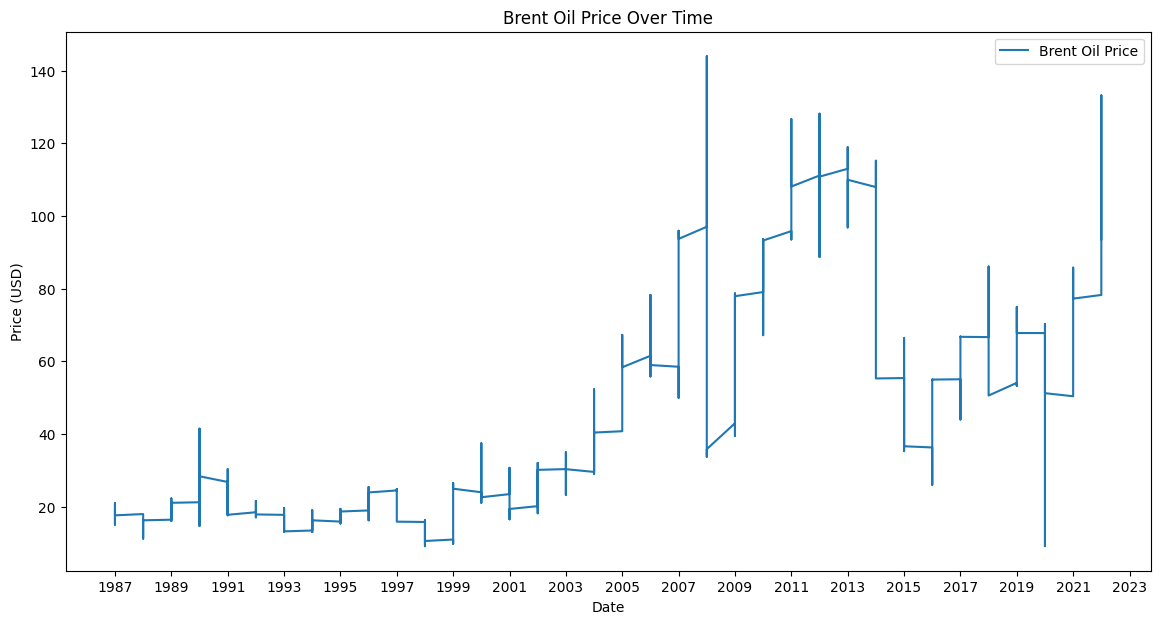

In [18]:
from scripts.plot import priceOverTime
priceOverTime(data)